In [14]:
# Importing various Libraries and functions

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [15]:
# making Array of diffrent classifiers names and functions to execute them
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [16]:
# Making a synthetic dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

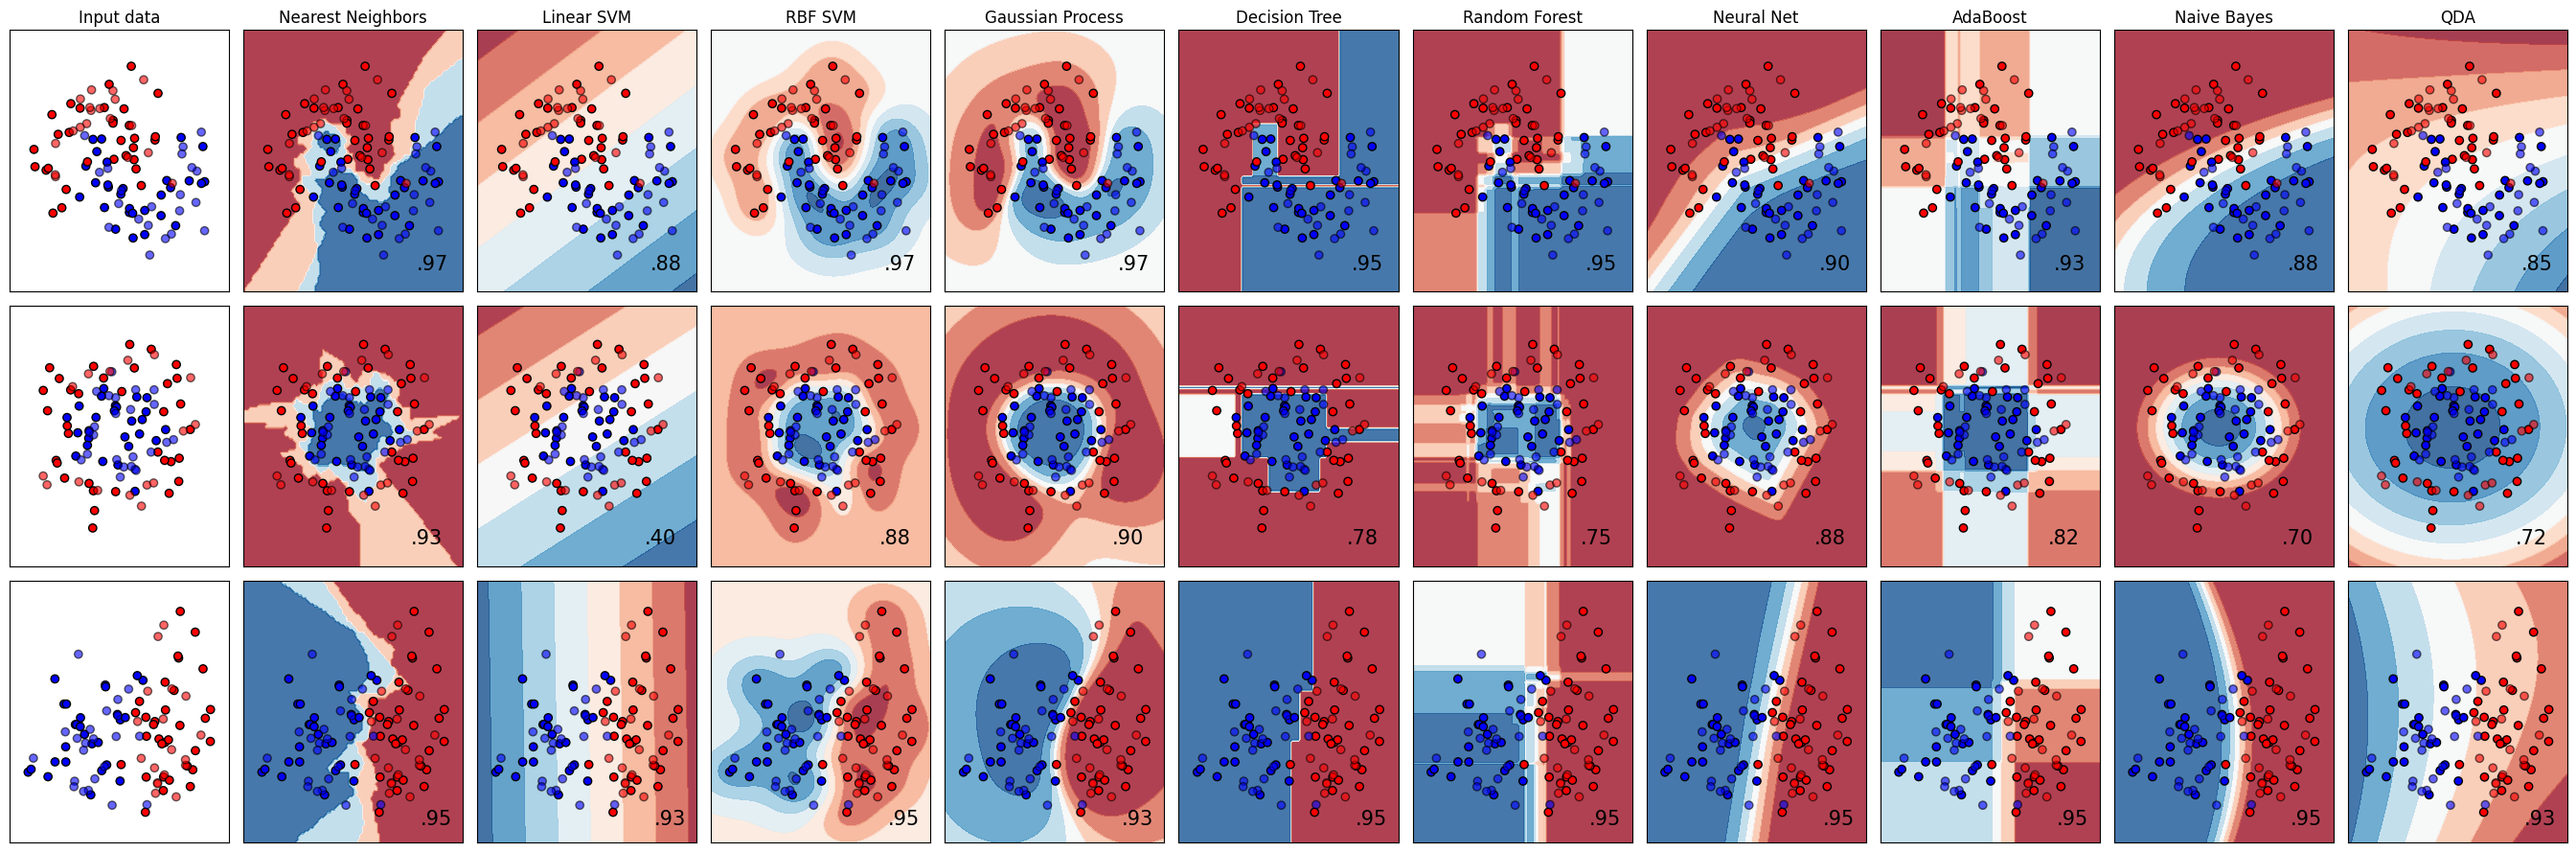

In [17]:
# making figure for visualization 
figure = plt.figure(figsize=(27, 9))

i = 1


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1


# display the plot 
plt.tight_layout()
plt.show()



<br><br><br><br>1. Nearest Neighbors (KNeighborsClassifier):

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data. 

<br>Can be used in Small and Medium sized datasets with non-linear and complex decision boundries<br>


Pros:<br>
=>Simple and easy to understand and  implement as the complexity of the algorithm is not that high.
<br>
=>Few Hyperparameters – The only parameters which are required are k and the distance metric.
<br>
=>Can handle complex decision boundaries.
<br>

Cons:<br>
=>Sensitive to the choice of k and Prone to Overfitting.<br>
=>algorithm faces a hard time when the dimensionality is too high.<br>
=>Computationally expensive during prediction for large datasets.<br>


refrence : https://www.geeksforgeeks.org/k-nearest-neighbours/




<br><br><br>2. Linear SVM (SVC with linear kernel):

SVM stands for support vector Machines <br>

It Constructs a hyperplane to separate classes in the feature space by maximizing the margin between classes.
In Higher dimensions decision boundary is called a “hyperplane”.
The best hyperplane is that plane that has the maximum distance from both the classes, and this is the main aim of SVM.<br>

Used When the data is perfectly linearly separable and have High-dimensional feature spaces.

Pros:<br>
=>Effective in high-dimensional spaces.<br>
=>Regularization parameter (C) allows control of the trade-off between smooth decision boundary and accurate classification.

Cons:<br>
=>May not perform well on highly non-linear data.
<br>

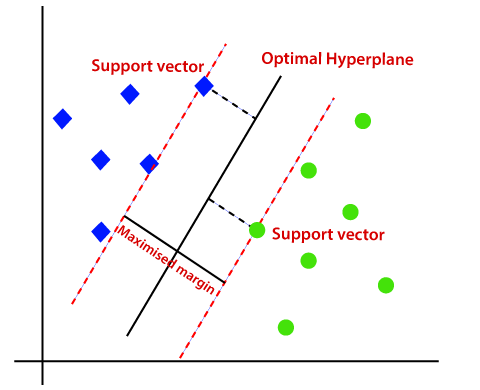


Refrence:
https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/






<br><br><br>3. RBF SVM (SVC with RBF kernel):

Uses a radial basis function (RBF) kernel to handle non-linear decision boundaries and Adjusts the width of the Gaussian function to control smoothness.<br>

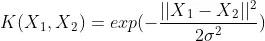

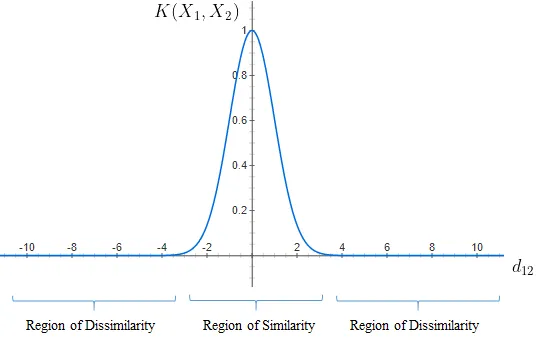
 
 
 <br>γ is inversely proportional to σ.


<br>used inModerate-sized datasets with Non-linear and complex decision boundaries.<br>

Pros:<br>
=>Effective in high-dimensional spaces.<br>
=>Can handle non-linear decision boundaries.<br>

Cons:<br>
=>Choice of hyperparameters (C, gamma) can impact performance.<br>
=>Computationally expensive for large datasets.<br>

Refrence:https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a



<br><br><br>4. Gaussian Process (GaussianProcessClassifier)

It is based on the idea of using a Gaussian process to model the relationship between the input features and the target labels of a classification problem. GPC makes use of Bayesian inference to make predictions, which means that it can output not only the most likely class label for input but also a measure of the uncertainty of the prediction.

Used in Small to medium-sized datasets where uncertainty estimation is crucial.

Pros:<br>
=>Provides uncertainty estimates.<br>
=>Flexible modeling of complex relationships.

Cons:<br>
=>Computationally expensive for large datasets.<br>
=>Interpretability can be challenging.


Refrence:https://www.geeksforgeeks.org/probabilistic-predictions-with-gaussian-process-classification-gpc-in-scikit-learn/


<br><br><br>5. Decision Tree (DecisionTreeClassifier)

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm.

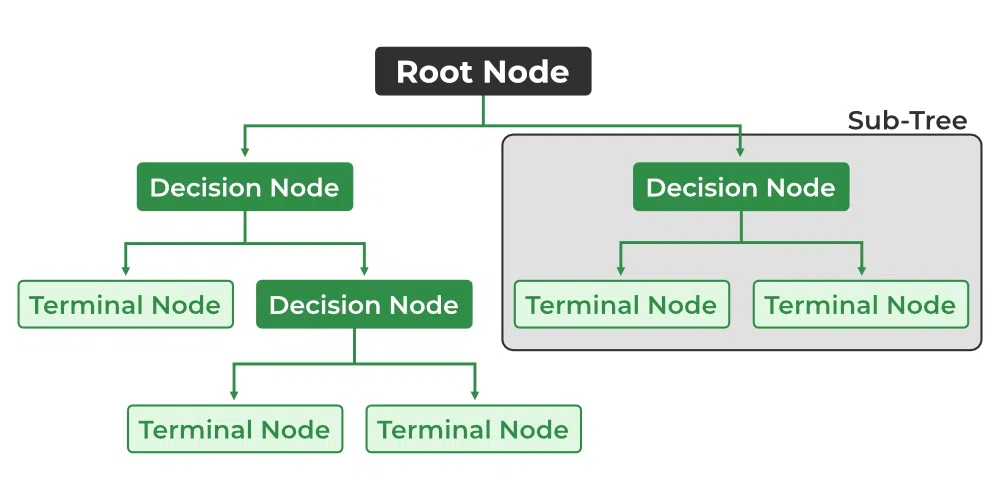

Divides the feature space into regions based on feature thresholds.
Makes decisions by traversing the tree from the root to a leaf.

Step-1:<br> Begin the tree with the root node, says S, which contains the complete dataset.<br>
Step-2:<br> Find the best attribute in the dataset using Attribute Selection Measure (ASM).<br>
Step-3:<br> Divide the S into subsets that contains possible values for the best attributes.<br>
Step-4:<br> Generate the decision tree node, which contains the best attribute.<br>
Step-5:<br> Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf nodeClassification and Regression Tree algorithm.<br>

<br>Pros:<br>
Easy to interpret and visualize.<br>
Can handle non-linear relationships and interactions.<br>
<br>Cons:<br>
Prone to overfitting.<br>
Sensitive to small variations in the data.<br>



Refrence:https://www.geeksforgeeks.org/decision-tree/


<br><br><br>6. Random Forest (RandomForestClassifier)

It combines the output of multiple decision trees to reach a single result.<br>
Bagging, also known as Bootstrap Aggregation, serves as the ensemble technique in the Random Forest algorithm.<br>

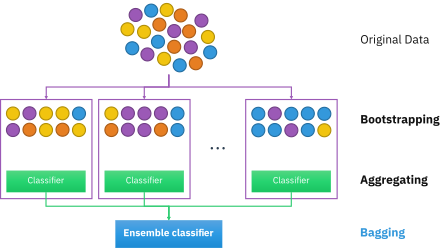


Step 1:<br> In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.<br><br>
Step 2:<br> Individual decision trees are constructed for each sample.<br>
Step 3:<br> Each decision tree will generate an output.
<br>Step 4:<br> Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.<br>



Pros:<br>
Improved accuracy and generalization.<br>
Robust to overfitting.<br>
Cons:<br>
Less interpretable than individual trees.<br>

Refrence:
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/


<br><br><br>7. Neural Network (MLPClassifier):

An MLP is a type of feedforward neural network that consists of multiple layers of neurons, with each layer connected to the next. The MLPClassifier class provides various options for defining the network architecture, training the model, and evaluating its performance.<br>

It Learns complex relationships through layers of interconnected nodes.<br>
Pros:<br>
Can learn complex patterns.<br>
Suitable for large datasets and high-dimensional spaces.<br>

Cons:<br>
Requires careful tuning of hyperparameters.<br>
Computationally expensive for training.<br>

refrence:https://www.geeksforgeeks.org/compare-stochastic-learning-strategies-for-mlpclassifier-in-scikit-learn/


<br><br><br>8. AdaBoost (AdaBoostClassifier):<br>
AdaBoost is an ensemble method used to improve the model performance by combining multiple weak models to create a robust strong model.
AdaBoost works by fitting a sequence of weak models on different distributions of the data.<br>
It adjusts weights on misclassified samples to focus on difficult cases.


Pros:<br>
Often performs well without extensive tuning.<br>
Reduces overfitting.<br>

Cons:<br>
Sensitive to noisy data and outliers.


Refrence:https://aman.ai/coursera-ml/supervised-ml/#adaboost


<br><br><br>9. Naive Bayes (GaussianNB):

Based on Bayes' theorem and assumes independence between features given the class.It is a Simple and fast probabilistic model.

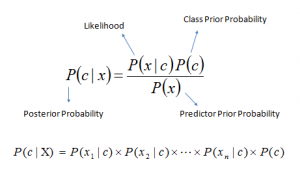

<br>It is a powerful tool in machine learning, particularly in text classification, spam filtering, and sentiment analysis, among others.

<br>Pros:<br>
Fast training and prediction.<br>
Handles high-dimensional data well.<br>
<br>Cons:<br>
Assumes feature independence, which may not hold in real-world scenarios.<br>


Refrence:https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

<br><br><br>10. Quadratic Discriminant Analysis (QuadraticDiscriminantAnalysis):

A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
Assumes different covariances for each class.

<br>Pros:<br>
More flexible than Naive Bayes in terms of covariance structure.

<br>Cons:<br>
Requires more data than Naive Bayes.<br>
Sensitive to the curse of dimensionality.

Refrence:https://www.geeksforgeeks.org/quadratic-discriminant-analysis/